# Self Driving Car Enginner NanoDegree
## Project: Finding Lane Lines on the Road

Author&Mail: chenklanj@gmail.com
In this project, we develop a program to identify lane lines both in multiple pictures and a video,where the result of images in test_images_out while video in test_videos_output.
The following includes common functions to detect lane lines, main process for image and main process for video.
## Common Functions
### Import Packages

In [1]:
# importing opencv and numerical packages
import cv2
import numpy as np

#convert image to grayscale
def grayImage(image):
    return cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

#guassian smoothing
def gaussianBlur(gray,kernel_size):
    return cv2.GaussianBlur(gray,(kernel_size,kernel_size),0)

#canny edge detection
def cannyGray(gray,low_threshold,high_threshold):
    return cv2.Canny(gray,low_threshold,high_threshold)

#define masked edges
#4 edges(points) to determine the edges
def masked_edges(image,edges):
    mask = np.zeros_like(edges)        #define a blank mask 
    ignore_mask_color = 256
    imshape = image.shape
    #four vertices to affect the result
    vertices = np.array([[(0,imshape[0]),(450,290),(450,290),(imshape[1],imshape[0])]],dtype=np.int32)
    cv2.fillPoly(mask,vertices,ignore_mask_color)   #filling pixels inside the polygon
    masked_edges=cv2.bitwise_and(edges,mask)        #masks where are not zeros
    return masked_edges

#hough transformation and draw continuous lines
def hough_lines(image,rho,theta,threshold,min_line_length,max_line_gap):
    line_image = np.zeros((image.shape[0],image.shape[1],3),dtype=np.uint8)
    
    #hough lines
    lines = cv2.HoughLinesP(image,rho,theta,threshold,np.array([]),min_line_length,max_line_gap)
    
    #define two lines for the lane
    #lefe lines parameters (start point to end point)    
    xlmin = image.shape[1]
    ylmin = image.shape[0]
    xlmax = 0
    ylmax = 0
    
    #right lines parameters (start point to end point)    
    xrmin = image.shape[1]
    yrmin = image.shape[0]
    xrmax = 0
    yrmax = 0
    
    #each line in hough lines
    for line in lines:
        for x1,y1,x2,y2 in line:
            #cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
            threshold = (y2-y1)/(x2-x1)
            if(threshold>0):            #left
                xlmin = min(min(x1,x2),xlmin)
                ylmin = min(min(y1,y2),ylmin)
                xlmax = max(max(x1,x2),xlmax)
                ylmax = max(max(y1,y2),ylmax)
            else:
                xrmin = min(min(x1,x2),xrmin)
                yrmin = min(min(y1,y2),yrmin)
                xrmax = max(max(x1,x2),xrmax)
                yrmax = max(max(y1,y2),yrmax)                
    
    #add two lines
    cv2.line(line_image,(xlmin,ylmin),(xlmax,ylmax),(255,0,0),10)
    cv2.line(line_image,(xrmax,yrmin),(xrmin,yrmax),(255,0,0),10) 
    
    #create a color binary iamge to combine with line image   
    color_edges = np.dstack((image,image,image))
    
    #draw lines with thickness
    combo = cv2.addWeighted(color_edges,0.8,line_image,1,0)
    return combo

##Test Image

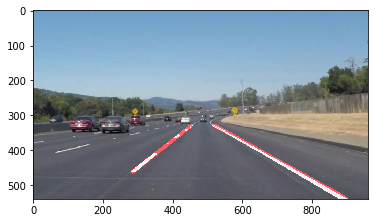

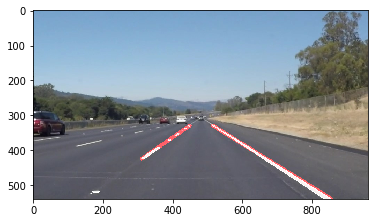

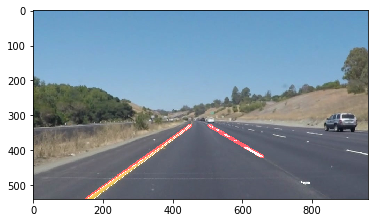

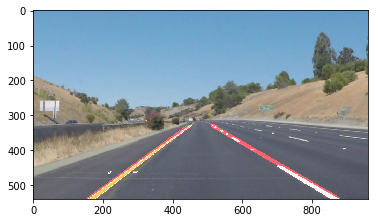

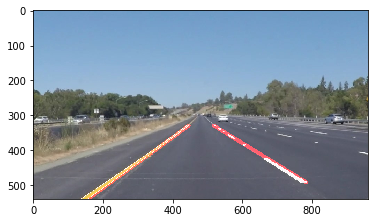

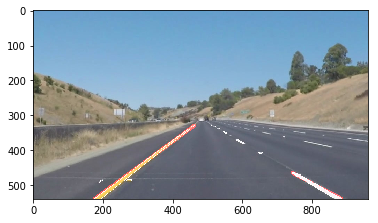

In [2]:
#import plot and os packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

#common functions

#for each image file
#input: folder,containing image files, e.g. test_images
#input: file, image files, e.g. solidWhiteCurve.jpg
def imageProcess(folder,file):
    #define image
    image = mpimg.imread(folder+'/'+file)
    
    #define parameters for gray and canny edge detection
    kernel_size = 5
    low_threshold = 50
    high_threshold = 180
    
    #convert image to gray
    gray = grayImage(image)
    #gaussian smoothing
    blur_gray = gaussianBlur(gray,kernel_size)
    edges = cannyGray(blur_gray,low_threshold,high_threshold)
    
    #masked edges
    mask = np.zeros_like(edges)
    ignore_mask_color = 255

    imshape = image.shape
    vertices = np.array([[(0,imshape[0]),(440,330),(540,330),(imshape[1],imshape[0])]],dtype=np.int32)
    
    cv2.fillPoly(mask,vertices,ignore_mask_color)
    mask_edges = cv2.bitwise_and(edges,mask)
    
    #hough transform parameters    
    rho = 2
    theta = np.pi/180
    threshold = 15
    min_line_length = 40
    max_line_gap = 20
    combo = hough_lines(mask_edges,rho,theta,threshold,min_line_length,max_line_gap)
    
    #add line to origin image
    combat = cv2.add(combo,image)
    
    #show result
    plt.imshow(combat)
    plt.show()
    
    #save files in test_images_out folders
    mpimg.imsave("test_images_out/"+pic,combat)
    
    
#files in the folders 
files = os.listdir('test_images')
for index,pic in enumerate(files):
    imageProcess('test_images/',pic)
    

##Test Video

In [3]:
#import packages
import imageio

from moviepy.editor import VideoFileClip
from IPython.display import HTML

#detect lane for each image
def imageProcessVideo(image):
    #gray parameters
    kernel_size = 5
    low_threshold = 50
    high_threshold = 180
    
    #convert image to gray
    gray = grayImage(image)
    blur_gray = gaussianBlur(gray,kernel_size)
    edges = cannyGray(blur_gray,low_threshold,high_threshold)
    
    #masked edges
    mask = np.zeros_like(edges)
    ignore_mask_color =255
    
    imshape = image.shape
    vertices = np.array([[(0, imshape[0]), (440, 330), (540, 330), (imshape[1], imshape[0])]], dtype=np.int32)
    
    cv2.fillPoly(mask,vertices,ignore_mask_color)
    mask_edges = cv2.bitwise_and(edges,mask)
    
    #hough transformation parameters
    rho = 2
    theta = np.pi/180
    threshold = 15
    min_line_length = 40
    max_line_gap = 20
    combo = hough_lines(mask_edges, rho, theta, threshold, min_line_length, max_line_gap)
    
    combat = cv2.add(combo,image)
    return combat

#output video
white_output = 'test_videos_output/solidYellowLeft.mp4'
#input video 
clip1 = VideoFileClip('test_videos/solidYellowLeft.mp4')
#video clip
white_clip = clip1.fl_image(imageProcessVideo)
#save video 
white_clip.write_videofile(white_output,audio=False)

[MoviePy] >>>> Building video test_videos_output/solidYellowLeft.mp4
[MoviePy] Writing video test_videos_output/solidYellowLeft.mp4


100%|█████████▉| 681/682 [01:13<00:00,  9.26it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidYellowLeft.mp4 



In [4]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))